<div style="text-align: center;">
    <img src="../images/iofbanner.png" alt="Banner curso" style="width:80%">
</div>

# Tema 2
### Sound of Speed

In [174]:
import os
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
import netCDF4 as nc
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Variables
T = 20
S = 35
Z = 0

In [ ]:
# Cálculos
A = 4.591 * T
B = -0.05304 * T**2
C = 0.0002374 * T**3
D = 1.340 * (S - 35)
E = -0.01025 * T * (S - 35)
F = 0.0613 * Z
G = 1.675e-7 * Z**2
H = -7.139e-13 * T * Z**3

# Sonido
Sonido = 1448.96 + A + B + C + D + E + F + G + H
print(Sonido)


In [ ]:
# Gráficas
plt.figure()
plt.plot(S, Sonido, 'o')
plt.xlabel('Salinidad (S)')
plt.ylabel('Velocidad del sonido (m/s)')
plt.title('Velocidad del sonido vs Salinidad')
plt.show()



In [ ]:
plt.figure()
plt.plot(T, Sonido, 'ko')
plt.xlabel('Temperatura (T)')
plt.ylabel('Velocidad del sonido (m/s)')
plt.title('Velocidad del sonido vs Temperatura')

plt.show()

## Elipsoidal

In [ ]:
# Constantes
a = 6378137
b = 6356752.31

# Rango de valores para x
x = np.linspace(-a, a, 6000)  # De -6378137 a 6378137 con 1000 puntos equidistantes
# x = np.arange(-6378137, 6378138, 1)  # De -6378137 a 6378137 con paso de 1

# Cálculo de y
y = np.sqrt((1 - (x**2 / a**2)) * b**2)

# Gráficas
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Parte superior de la elipse', color='blue')
plt.plot(x, -y, label='Parte inferior de la elipse', color='red')

# Detalles de la gráfica
plt.xlabel('x (metros)')
plt.ylabel('y (metros)')
plt.title('Gráfica de la elipse')
plt.legend(loc='best')
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

# Mostrar la gráfica
plt.show()

In [ ]:
# Identificar el nombre del archivo netCDF
resources_path = "../resources/"
catalogo = [f for f in os.listdir("../resources/") if f.endswith('.nc')]
if not catalogo:
    raise FileNotFoundError("No se encontraron archivos .nc en la carpeta 'resources'.")
name = os.path.join(resources_path, catalogo[0])
# name = catalogo[0]1
name

In [ ]:
# Obtener información del archivo netCDF
dataset = nc.Dataset(name)
Lat = dataset.variables['lat'][:]
Lon = dataset.variables['lon'][:]
Z2 = dataset.variables['elevation'][:]
Z = Z2.astype(float)



In [ ]:
print(f'Lat size: {Lat.size}')
print(f'Lon size: {Lon.size}')
print(f'Z size: {Z.size}')

print(f'Lat shape: {Lat.shape}')
print(f'Lon shape: {Lon.shape}')
print(f'Z shape: {Z.shape}')


In [ ]:
# Gráfica de pcolor
plt.figure()
plt.pcolor(Lon, Lat, Z, shading='nearest')
plt.colorbar()
plt.clim = (-6000, 4000)
plt.title('Batimetría de Hawaii')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()


In [ ]:
# Gráfica de mesh
X, Y = np.meshgrid(Lon, Lat)
# plt.figure()
# plt.figure(figsize=(12, 8))
ax = plt.figure(figsize=(12, 8)).add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
plt.title('Superficie 3D de Batimetría de Hawaii')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

In [ ]:
# Gráfica de contorno
plt.figure()
plt.figure(figsize=(12, 8))
contour = plt.contour(X, Y, Z, 30)
plt.colorbar(contour)
plt.title('Contorno de Batimetría de Hawaii')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

In [ ]:
# Gráfica de contorno 3D
fig = plt.figure(figsize=(9, 8))
ax = fig.add_subplot(111, projection='3d')
contour3 = ax.contour3D(X, Y, Z, 100)
plt.colorbar(contour3)
plt.title('Contorno 3D de Batimetría de Hawaii')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

In [ ]:
# Digitalizar línea de costa de GEarth y convertirla en GPS, visualizar
Costa = np.zeros((100, 10))

# Agregar línea de costa a la gráfica de contorno
plt.figure(figsize=(6, 4))
contour = plt.contour(X, Y, Z, 30)
plt.colorbar(contour)
plt.plot(Costa[:, 2], Costa[:, 1], 'k')
plt.title('Contorno con línea de costa de Hawaii')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

# Tema 3
## Actividad Asincrónica 03 – Flujos de Calor

Utiliza la ecuación completa de flujos de calor atmósfera-océano que se programó en clase para calcular los cambios de temperatura durante 24 hrs ocasionados por las siguientes combinaciones de condiciones:

| Condición | $Q_5(1-a)$ | $Q_b$ | $Q_e$ | $Q_c$ |
| :---: | :---: | :---: | :---: | :---: |
| 1 | 240 | $n_c = 0$ | $W=15; T_a=40; H_R= 20%$ | $W=15; T_a=40; T_s=18$ |
| 2 | 240 | $n_c = 0.4$ | $W=8; T_a=36; H_R= 95%$ | $W=8; T_a=36; T_s=30$ |
| 3 | 100 | $n_c = 0.7$ | $W=8; T_a=36; H_R= 95%$ | $W=15; T_a=8; T_s=15$ |

Donde $n_c$ es la proporción del cielo cubierta por nubes, $W$ la velocidad del viento en $m/s$, $T_a$ la temperatura del aire en $^\circ C$, $H_R$ humedad relativa, $T_s$ temperatura de la superficie del mar en $^\circ C$.  

Escribe un informe breve con resumen, introducción, métodos, resultados-discusión y conclusiones, que no exceda 10 páginas ni sea menor a 4. Escribe tus resultados con base al tipo de ambiente que parece ser (desierto, zona tropical, etc) y el comportamiento de los procesos de transferencia de calor.

== Escribe tu informe aquí. ==

### Rutina para el cálculo de flujos de calor considerando todos los términos (ver clase 3.2 Influencias atmosféricas globales)


In [ ]:
# Condiciones de radiación de alta frecuencia Qs(1-A)
A   = 0.3
Qs1 = 340
Qs  = Qs1 * (1-A)

In [ ]:
# Calculo de radiación retrotransmitida Qb
es      = 0.985    # Valor de emisividad
sigma   = 5.67e-8  # constante de Stephan en Wm-2K4
Ts      = 30
ncc      = 0.5
Qb      = es * sigma * np.power((Ts+273), 4) * (1-0.6 * np.power(ncc, 2))

In [ ]:
# Calculo de flujo de calor por evaporación
Lv      = 2.5e6     # Transferencia de calor latente
Ce      = 1.5e-3    # Numero de Dalton
rhoa    = 1.22      # kg/m^3 - densidad del aire
W       = 15        # m/s - velocidad del viento
Ta      = 36        # Temperatura del aire grados centígrados
HR      = 95        # Humedad relativa en proporción 0-1

In [ ]:
# humedad específica de saturación  en kg/kg
qs = (3.8951 * np.exp(0.0631 * Ta)) / 1000 # Ta en Celsius

# humedad específica a partir de la humedad relativa y qs en kg/kg
qa = (HR * qs) / 100

In [ ]:
# Cálculo de la evaporación 
Ev = rhoa * Ce * W * (qs-qa)
Qe = Lv * Ev

In [ ]:
# Flujo de calor por conducción
Cs = 1.45e-3    # Numero de Stanton
ca = 1000       # Capacidad calorífica del aire
Qc = Cs * ca * rhoa * W * (Ts-Ta)

In [ ]:
# Balance sin advección
Qi      = Qs - Qb - Qe - Qc

cp      = 4000   # calor específico (capacidad calorífica) del agua de mar
rhow    = 1025   # densidad del agua de mar
z       = 10     # profundidad

dTdt    = Qi / (rhow * cp * z)   # grados por segundo
dTdia   = dTdt * 86400;

# Gráfico de barras
y       = np.array([-Qb, -Qe, -Qc])
c       = pd.Categorical(['Qb','Qe','Qc'])

colores = ['red', 'blue', 'green']
labels = ['desierto', 'selva', 'lat media']
plt.bar(c, y, label=labels, color=colores, alpha=0.7)
plt.xlabel('Flujo')
plt.ylabel('Valor')
plt.title('Balance sin advección')
plt.axhline(0, color='black',linewidth=0.5)
plt.legend()
plt.show()

In [ ]:
# Radiación retrotransmitida al mar...por efecto invernadero
sigma2  = 5.18e-13   # constante de Stephan en Wm-2K4
Qb2     = sigma2 * (1+0.17 * (np.power(ncc, 2))) * np.power((Ta+273), 6)

# Balance con invernadero Qb2
Qi2     = Qs - Qb + Qb2 - Qe - Qc

dT2     = Qi2 / (rhow * cp * z)
dTdia2  = dT2 * 86400;

y       = np.array([-Qb, Qb2, -Qe, -Qc])
c       = pd.Categorical(['Qb','Qb2','Qe','Qc']);

colores = ['red', 'yellow', 'blue', 'green']
labels = ['desierto', 'EI', 'selva', 'lat media']
plt.bar(c,y, label=labels, color=colores, alpha=0.7)
plt.xlabel('Flujo')
plt.ylabel('Valor')
plt.title('Radiación retrotransmitida al mar...por efecto invernadero')
plt.axhline(0, color='black',linewidth=0.5)
plt.legend()
plt.show()

# Tema 4
### Flujos Boyancia

Utilizando la ecuación donde explícitamente se define en función de la evaporación.

In [ ]:
g       = 9.81          # m/s^2
Cw      = 4186          # calor específico del agua de mar (J/(kgC) 
alfa    = 2.9742e-4     # coeficiente de expansión térmica a 35 g/kg y 25C
beta    = 7.347e-4      # coeficiente de contracción halina a 35 g/kg y 25C 
s       = 0.035

In [ ]:
# Contribución de los flujos de calor
B1a = (1 / Cw) * g * alfa * (Qs - Qb - Qc)
B1b = (1 / Cw) * g * alfa * (-Qe)

# Contribución de la evaporación a la sal
B2  = -g * beta * s * Ev

In [ ]:
# Contribución de la precipitación
P       = 0.0083    # 1 mm de lluvia = 1 lt/m^2 
beta    = 7.347e-4  # coeficiente de expansión térmica a 35 g/kg y 25C 
s       = 0.035
B3      = g * beta *s * P
B       = B1a + B1b + B2 + B3;

In [ ]:
y   = np.array([B1a, B1b, B2, B3])
c   = pd.Categorical(['Calor','Calor E','Evap Sal', 'Prec']);
colores = ['red', 'yellow', 'blue', 'green']
labels = ['Calor','Calor E','Evap Sal', 'Prec']
plt.bar(c,y, label=labels, color=colores, alpha=0.7)
plt.xlabel('Flujo')
plt.ylabel('Valor')
plt.title('Flujos Boyancia')
plt.axhline(0, color='black',linewidth=0.5)
plt.legend()
plt.show()

# Tema 6

### Ekman

In [ ]:
# Calculo del estrès del viento
rhoa    = 1.25      # densidad del aire
Cd      = 2.3e-3    # Coeficiente de arrastre
W10     = 10        # m/s velocidad del viento
Tw      = rhoa * Cd * np.power(W10, 2)

In [ ]:
# Calculo de Coriolis
lat = 60 * (np.pi / 180 )       # latitud
Om  = 2 * np.pi / (24 * 3600)
f   = 2 * Om * np.sin(lat)

In [ ]:
# Grosor de la capa de Ekman
Az = 5e-3  #viscosidad turbulenta
De = np.pi * np.sqrt((2 * Az) / f)

In [ ]:
# Velocidad superficial
rhow    = 1027      # densidad del agua de mar
Vo      = (np.sqrt(2) * np.pi * Tw) / (rhow * f * De);

In [ ]:
# definiciòn del vector de velocidad
dz  = 0.5
z = -1 * np.arange(0,2 * np.ceil(De) + dz, dz)

u = Vo * np.exp((np.pi * z) / De) * (np.cos((np.pi / 4) - ((np.pi * z) / De)))
v = -Vo * np.exp((np.pi * z) / De) * (np.sin((np.pi / 4) - ((np.pi * z) / De)))
V = np.sqrt(np.power(u,2) +np.power(v, 2))

Ut = np.sum(u)*dz
Vt = np.sum(v)*dz

In [ ]:
# Gráficos
plt.figure()
plt.plot(V, z, 'k.-', label='V')
plt.plot(u, z, 'k.-', label='u')
plt.plot(v, z, 'b.-', label='v')
plt.grid()
plt.legend()
plt.axis([-Vo, Vo, np.min(z), 0])
plt.xlabel('Velocidad')
plt.ylabel('Profundidad')
plt.title('Perfil de Velocidad en la Capa de Ekman')
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(u, v, z, '.r')
ax.grid()
ax.set_xlabel('u')
ax.set_ylabel('v')
ax.set_zlabel('z')
plt.title('Perfil de Velocidad en 3D')
plt.show()

In [ ]:
# Gráfica de vectores
x = np.repeat(10, np.max(len(u)))
y = np.repeat(10, np.max(len(u)))

plt.figure()
plt.quiver(x, y, u, v)
plt.quiver(x[0], y[0], Ut * 0.02, Vt * 0.02, color='r')
plt.title('Vector de Velocidad Superficial')
plt.show()

### Geostrofia de altimetria

In [ ]:
# Identificar el nombre del archivo netCDF
resources_path = "../resources/"
catalogo = [f for f in os.listdir("../resources/") if f.startswith('d') and f.endswith('.nc')]
if not catalogo:
    raise FileNotFoundError("No se encontraron archivos .nc en la carpeta 'resources'.")
file_name = os.path.join(resources_path, catalogo[0])
# file_name = catalogo[0]1
file_name

In [ ]:
# Obtener información del archivo netCDF
dataset = nc.Dataset(file_name)
Lat = dataset.variables['latitude'][:]
Lon = dataset.variables['longitude'][:]
Z2 = dataset.variables['adt'][:]
Z = Z2

In [ ]:
Z =np.ma.masked_invalid(Z[0, :, :])
Z

In [ ]:
print("Dimensiones de Lon:", Lon.shape)
print("Dimensiones de Lat:", Lat.shape)
print("Dimensiones de Z:", Z.shape)
Z = Z[0, :, :]
print("Dimensiones de Z:", Z.shape)


In [ ]:
# Graficar la variable Z
plt.figure()
plt.pcolor(Lon, Lat, Z, shading='nearest')
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Altimetry Data')
plt.show()

In [ ]:
# Crear la malla de coordenadas
LO, LA = np.meshgrid(Lon, Lat)
nLat = Lat.size
nLon = Lon.size

In [ ]:
Y1 = (LA - LA[0]) * 60 * 1.852 * 1000
X1 = np.zeros_like(LO)
for i in range(nLat):
    X1[i, :] = (LO[i, :] - LO[i, 0]) * 60 * 1.852 * 1000 * np.cos(np.radians(LA[i, 0]))


In [ ]:
omega = (2 * np.pi) / (24 * 3600)
phi = np.radians(LA)
f = 2 * omega * np.sin(phi)
g = 9.81

u = np.zeros((nLat, nLon))
v = np.zeros((nLat, nLon))

for i in range(nLat - 1):
    for j in range(nLon - 1):
        dz = Z[i + 1, j] - Z[i, j]
        dy = Y1[i + 1, j] - Y1[i, j]
        u[i, j] = -(g / f[i, j]) * (dz / dy)

In [ ]:
for j in range(nLon - 1):
    for i in range(nLat - 1):
        dz = Z[i, j + 1] - Z[i, j]
        dx = X1[i, j + 1] - X1[i, j]
        v[i, j] = (g / f[i, j]) * (dz / dx)

u[nLat - 1, :] = u[nLat - 2, :]
u[:, nLon - 1] = u[:, nLon - 2]
v[nLat - 1, :] = v[nLat - 2, :]
v[:, nLon - 1] = v[:, nLon - 2]

In [ ]:
plt.figure()
plt.pcolor(LO, LA, Vx, shading='flat')
plt.colorbar()
plt.clim(0, 2.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Velocity Magnitude')
plt.show()

In [ ]:
X2 = LO.flatten()
a = np.arange(0, len(X2), 13)

plt.figure()
plt.pcolor(LO, LA, Vx, shading='flat')
plt.colorbar()
plt.clim(0, 2.5)
plt.quiver(LO.flatten()[a], LA.flatten()[a], u.flatten()[a], v.flatten()[a], scale=10, color='w')
plt.title('With Altimetry')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Geostrofia Teorica

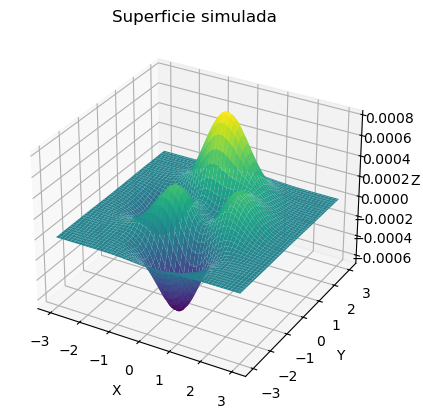

In [180]:
# Definir la función peaks
def peaks(n=49):
    x = np.linspace(-3, 3, n)
    y = np.linspace(-3, 3, n)
    X, Y = np.meshgrid(x, y)
    Z = 3 * (1 - X) ** 2 * np.exp(-X ** 2 - (Y + 1) ** 2) - \
        10 * (X / 5 - X ** 3 - Y ** 5) * np.exp(-X ** 2 - Y ** 2) - \
        1 / 3 * np.exp(-(X + 1) ** 2 - Y ** 2)
    return X, Y, Z

# Simulando una variación en el nivel del mar con la función peaks
n = 100
X, Y, Z = peaks(n)
Z = Z / 10000

# Crear la superficie
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_title('Superficie simulada')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

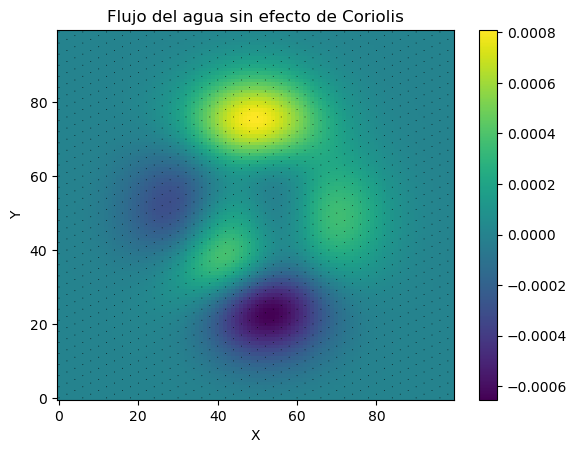

In [185]:
# Calcular la pendiente de la superficie
Fy, Fx = np.gradient(Z)
X, Y = np.meshgrid(np.arange(n), np.arange(n))

# ¿Cómo fluiría el agua si coriolis no actuara solo por efecto de la pendiente?
plt.figure()
plt.pcolor(X, Y, Z, shading='auto', cmap='viridis')
plt.colorbar()
x = X.flatten()
y = Y.flatten()
fx = -Fx.flatten()
fy = -Fy.flatten()
a = np.arange(0, len(x), 6)  # adelgazamiento de vectores
plt.quiver(x[a], y[a], fx[a], fy[a], scale=3, color='k')
plt.title('Flujo del agua sin efecto de Coriolis')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


IndexError: index 6 is out of bounds for axis 0 with size 1

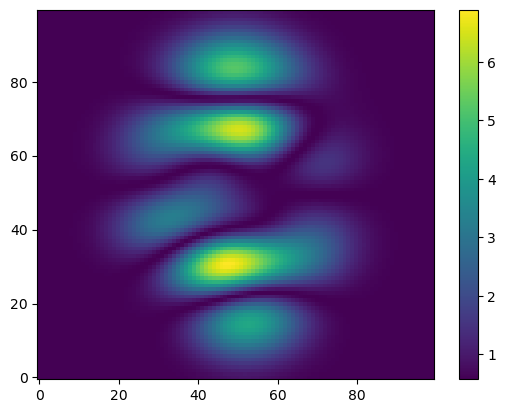

In [197]:
# Calculo de Coriolis, asumiendo que todo ocurre a una latitud de 45 grados
omega = (2 * np.pi) / (24 * 3600)
lat = 45
phi = np.deg2rad(lat)
f = 2 * omega * np.sin(phi)
Fx = 0.6 / 100000

g = 9.81
u = -(g / f) * Fy
v = (g / f) * Fx
Vx = np.sqrt(u**2 + v**2)

plt.figure()
plt.pcolor(X, Y, Vx, shading='auto', cmap='viridis')
plt.colorbar()
U = u.flatten()
V = v.flatten()
a = np.arange(0, len(x), 6)  # adelgazamiento de vectores
plt.quiver(x[a], y[a], U[a], V[a], scale=3, color='k')
plt.title('Velocidad con efecto de Coriolis')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

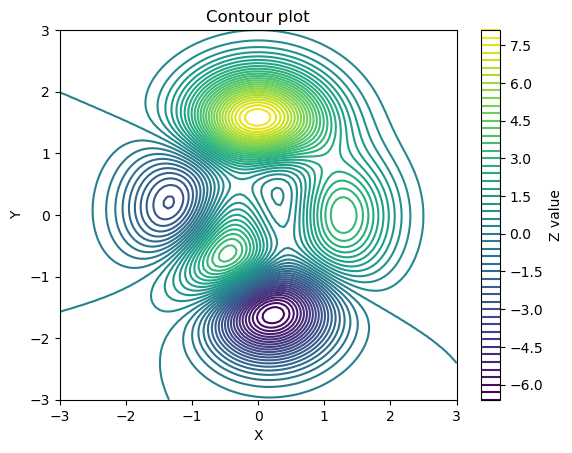

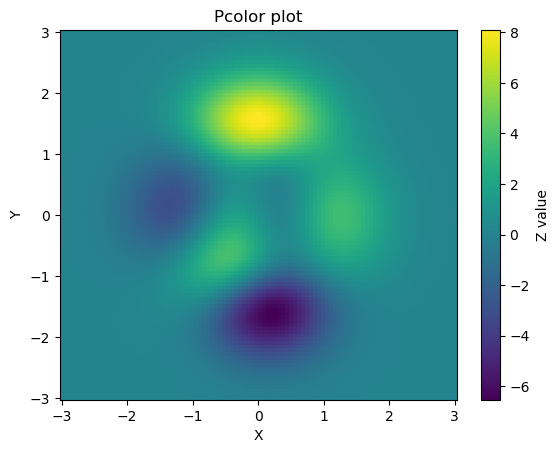

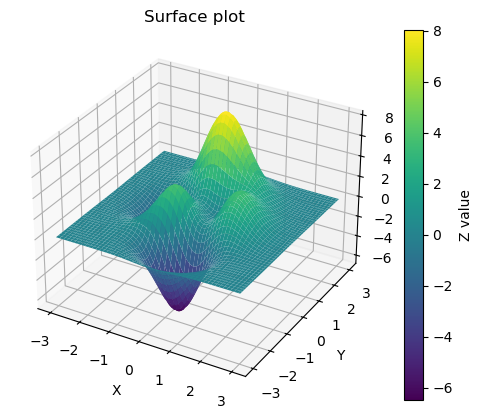

In [176]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the peaks function
def peaks(n=49):
    x = np.linspace(-3, 3, n)
    y = np.linspace(-3, 3, n)
    X, Y = np.meshgrid(x, y)
    Z = 3 * (1 - X) ** 2 * np.exp(-X ** 2 - (Y + 1) ** 2) - \
        10 * (X / 5 - X ** 3 - Y ** 5) * np.exp(-X ** 2 - Y ** 2) - \
        1 / 3 * np.exp(-(X + 1) ** 2 - Y ** 2)
    return X, Y, Z

# Generate the data
n = 100
X, Y, Z = peaks(n)

# Contour plot
plt.figure()
plt.contour(X, Y, Z, 50, cmap='viridis')
plt.colorbar(label='Z value')
plt.title('Contour plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Pcolor plot
plt.figure()
plt.pcolor(X, Y, Z, shading='auto', cmap='viridis')
plt.colorbar(label='Z value')
plt.title('Pcolor plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis')
fig.colorbar(surf, label='Z value')
ax.set_title('Surface plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

### Inerciales

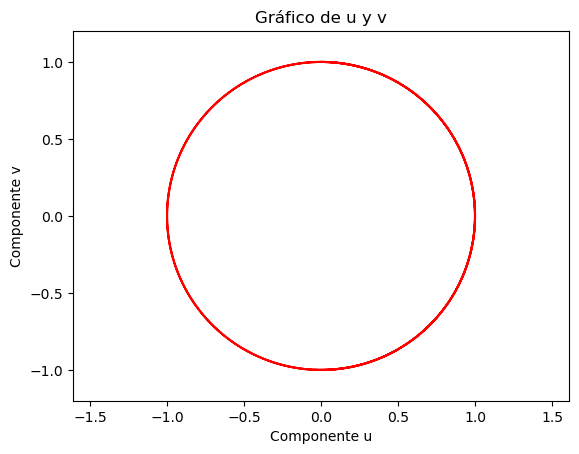

In [206]:
# Velocidad inicial
Vh = 1

# Parámetro de Coriolis
lat = 70 * (np.pi / 180)
Om = 2 * np.pi / (24 * 3600)
f = 2 * Om * np.sin(lat)

# Generar un tiempo inicialmente aleatorio
Ti = 32 * 3600  # horas en segundos
t = np.arange(1, Ti + 1)

# Calculo de las corrientes inerciales
u = Vh * np.sin(f * t)
v = Vh * np.cos(f * t)

x = np.repeat(10, len(u))
y = np.repeat(10, len(u))
a = np.arange(0, len(x), 1200)

# Gráfico de u y v
plt.figure()
plt.plot(u, v, 'r')
plt.xlabel('Componente u')
plt.ylabel('Componente v')
plt.axis('equal')
plt.axis([-1.2, 1.2, -1.2, 1.2])
plt.title('Gráfico de u y v')
plt.show()


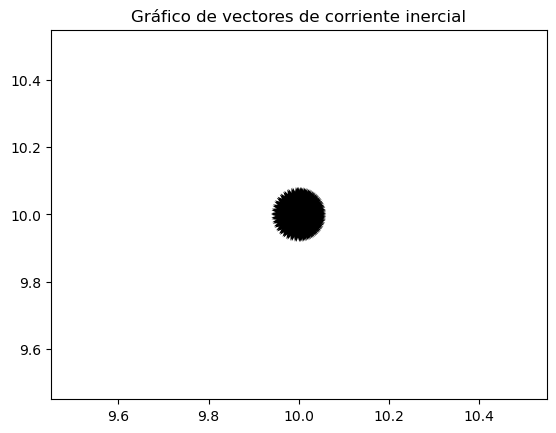

In [207]:
# Gráfico de quiver
plt.figure()
plt.quiver(x[a], y[a], u[a], v[a])
plt.title('Gráfico de vectores de corriente inercial')
plt.show()

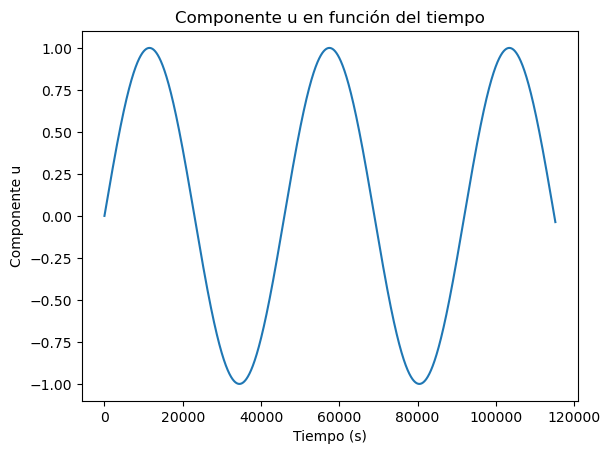

In [208]:
# Gráfico de t y u
plt.figure()
plt.plot(t, u)
plt.xlabel('Tiempo (s)')
plt.ylabel('Componente u')
plt.title('Componente u en función del tiempo')
plt.show()

In [209]:
# Radio de deformación de Rosby
r = Vh / f
Rkm = r / 1000

# Periodo inercial
Ti_inercial = 2 * np.pi / f
Ti_hr = Ti_inercial / 3600

print(f'Radio de deformación de Rosby: {Rkm:.2f} km')
print(f'Periodo inercial: {Ti_hr:.2f} horas')

Radio de deformación de Rosby: 7.32 km
Periodo inercial: 12.77 horas
